### 加载数据集

In [13]:
import sys
sys.path.append('../../')


from datasets.datasets import DatasetManager

dataset_manager = DatasetManager(batch_size=512)
# train_loader, test_loader = dataset_manager.cifar_dataset()
train_loader, test_loader = dataset_manager.mnist_dataset()

Using device: cuda:7
CIFAR-10 path: /home/jzgrp/huiwang/mio/Code/KAN/datasets/CIFAR10
MNIST path: /home/jzgrp/huiwang/mio/Code/KAN/datasets/mnist


### 加载模型

In [14]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
# from torchmetrics import Accuracy
import torch.nn.functional as F
from models.models import ModelManager 

model_manager = ModelManager()




class PCAKAN(nn.Module):
    def __init__(self):
        super(PCAKAN, self).__init__()
        # PCA 层：将输入从 28*28 降维到 128
        # self.pca = model_manager.PCALayer(input_dim=28*28, output_dim=128)
        # self.kan1 = model_manager.KANLinear(128, 32)
        self.kan2 = model_manager.KANLinear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        # x = self.pca(x)  # PCA 降维
        # x = self.kan1(x)
        x = self.kan2(x)
        return x


class PCAMLP(nn.Module):
    def __init__(self):
        super(PCAMLP, self).__init__()
        # PCA 层：将输入从 28*28 降维到 128
        self.mlp1 = model_manager.MLPLinear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        # x = self.pca(x)  # PCA 降维
        # x = self.kan1(x)
        x = self.mlp1(x)
        return x



class KANKANReLU(nn.Module):
    def __init__(self):
        super(KANKANReLU, self).__init__()
        self.kan1 = model_manager.KANLinear(28*28, 32, base_activation=nn.ReLU)
        self.kan2 = model_manager.KANLinear(32, 10, base_activation=nn.ReLU)
        # self.kan3 = model_manager.KANLinear(32, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        x = self.kan1(x)
        x = self.kan2(x)
        # x = self.kan3(x)
        return x
    
class KANKANGELU(nn.Module):
    def __init__(self):
        super(KANKANGELU, self).__init__()
        self.kan1 = model_manager.KANLinear(28*28, 32, base_activation=nn.GELU)
        self.kan2 = model_manager.KANLinear(32, 10, base_activation=nn.GELU)
        # self.kan3 = model_manager.KANLinear(32, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        x = self.kan1(x)
        x = self.kan2(x)
        # x = self.kan3(x)
        return x

class KANKANMish(nn.Module):
    def __init__(self):
        super(KANKANMish, self).__init__()
        self.kan1 = model_manager.KANLinear(28*28, 32, base_activation=nn.Mish)
        self.kan2 = model_manager.KANLinear(32, 10, base_activation=nn.Mish)
        # self.kan3 = model_manager.KANLinear(32, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        x = self.kan1(x)
        x = self.kan2(x)
        # x = self.kan3(x)
        return x

class KANKAN(nn.Module):
    def __init__(self):
        super(KANKAN, self).__init__()
        self.kan1 = model_manager.KANLinear(28*28, 14)
        self.kan2 = model_manager.KANLinear(14, 10)
        # self.kan3 = model_manager.KANLinear(32, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        x = self.kan1(x)
        x = self.kan2(x)
        # x = self.kan3(x)
        return x

class KAN(nn.Module):
    def __init__(self):
        super(KAN, self).__init__()
        self.kan1 = model_manager.KANLinear(28*28, 10)
        # self.kan2 = model_manager.KANLinear(128, 32)
        # self.kan3 = model_manager.KANLinear(32, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        x = self.kan1(x)
        # x = self.kan2(x)
        # x = self.kan3(x)
        return x
    
class MLPMLP(nn.Module):
    def __init__(self):
        super(MLPMLP, self).__init__()
        self.mlp1 = model_manager.MLPLinear(28*28, 128)
        self.mlp2 = model_manager.MLPLinear(128, 10)
        # self.mlp3 = model_manager.MLPLinear(32, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        x = self.mlp1(x)
        x = self.mlp2(x)
        # x = self.mlp3(x)
        return x
    
class MLPMLPMLP(nn.Module):
    def __init__(self):
        super(MLPMLPMLP, self).__init__()
        self.mlp1 = model_manager.MLPLinear(28*28, 128)
        self.mlp2 = model_manager.MLPLinear(128, 32)
        self.mlp3 = model_manager.MLPLinear(32, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        x = self.mlp1(x)
        x = self.mlp2(x)
        x = self.mlp3(x)
        return x


class FourierKAN(nn.Module):
    def __init__(self):
        super(FourierKAN, self).__init__()
        self.fourierkan1 = model_manager.FourierKANLinear(28*28, 128)
        self.fourierkan2 = model_manager.FourierKANLinear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        x = self.fourierkan1(x)
        x = self.fourierkan2(x)
        return x

class ChebyKAN(nn.Module):
    def __init__(self):
        super(ChebyKAN, self).__init__()
        self.chebykan1 = model_manager.ChebyKANLinear(28*28, 128)
        self.chebykan2 = model_manager.ChebyKANLinear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        x = self.chebykan1(x)
        x = self.chebykan2(x)
        return x

class JacobiKAN(nn.Module):
    def __init__(self):
        super(JacobiKAN, self).__init__()
        self.jacobikan1 = model_manager.JacobiKANLinear(28*28, 128)
        self.jacobikan2 = model_manager.JacobiKANLinear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        x = self.jacobikan1(x)
        x = self.jacobikan2(x)
        return x

class TaylorKAN(nn.Module):
    def __init__(self):
        super(TaylorKAN, self).__init__()
        self.taylorkan1 = model_manager.TaylorKANLinear(28*28, 128)
        self.taylorkan2 = model_manager.TaylorKANLinear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        x = self.taylorkan1(x)
        x = self.taylorkan2(x)
        return x

class WaveletKAN(nn.Module):
    def __init__(self):
        super(WaveletKAN, self).__init__()
        self.waveletkan1 = model_manager.WaveletKANLinear(28*28, 128)
        self.waveletkan2 = model_manager.WaveletKANLinear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        x = self.waveletkan1(x)
        x = self.waveletkan2(x)
        return x

class CNNMLP(nn.Module):
    def __init__(self):
        super(CNNMLP, self).__init__()
        # 定义 CNN 层（适配 MNIST 数据集的输入 1 通道）
        self.conv1 = model_manager.ConvLinear(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = model_manager.ConvLinear(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        # 定义全连接层（经过两次池化操作，特征图大小从 28x28 缩小为 7x7）
        self.fc1 = model_manager.MLPLinear(32 * 7 * 7, 128)  # 第一全连接层
        self.fc2 = model_manager.MLPLinear(128, 10)  # 第二全连接层（10 分类）
        
    def forward(self, x):
        # 卷积和池化
        x = self.conv1(x)
        x = self.conv2(x)
        # 展开为一维向量
        x = x.view(x.size(0), -1)
        # 全连接层
        x = self.fc1(x)
        x = self.fc2(x)
        return x

class CNNKAN(nn.Module):
    def __init__(self):
        super(CNNKAN, self).__init__()
        # 定义 CNN 层（适配 MNIST 数据集的输入 1 通道）
        self.conv1 = model_manager.ConvLinear(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = model_manager.ConvLinear(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        # 定义全连接层（经过两次池化操作，特征图大小从 28x28 缩小为 7x7）
        self.fc1 = model_manager.KANLinear(32 * 7 * 7, 128)  # 第一全连接层
        self.fc2 = model_manager.KANLinear(128, 10)  # 第二全连接层（10 分类）
        
    def forward(self, x):
        # 卷积和池化
        x = self.conv1(x)
        x = self.conv2(x)
        # 展开为一维向量
        x = x.view(x.size(0), -1)
        # 全连接层
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    

class Transformer(nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        self.embedding = nn.Linear(28, 64)  # 将每行像素映射到嵌入维度 64
        # 定义 Transformer 层
        self.transformer1 = model_manager.TransformerLayer(embed_dim=64, num_heads=4, ff_dim=256)
        self.transformer2 = model_manager.TransformerLayer(embed_dim=64, num_heads=4, ff_dim=256)
        # 定义全连接层
        self.fc1 = model_manager.MLPLinear(64, 128)  # 第一全连接层
        self.fc2 = model_manager.MLPLinear(128, 10)  # 第二全连接层（10 分类）

    def forward(self, x, mask=None):
        # 将输入形状从 (batch_size, 1, 28, 28) 转为 (batch_size, 28, 28)
        x = x.squeeze(1)  # 去掉通道维度，变为 (batch_size, 28, 28)
        # 嵌入每行像素数据，形状变为 (28, batch_size, 64)
        x = self.embedding(x).permute(1, 0, 2)
        # 通过 Transformer 层
        x = self.transformer1(x, mask)
        x = self.transformer2(x, mask)
        # 平均池化以获取全局表示
        x = torch.mean(x, dim=0)  # 形状从 (seq_len, batch_size, embed_dim) -> (batch_size, embed_dim)
        # 全连接层
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    
class MLPKANKAN(nn.Module):
    def __init__(self):
        super(MLPKANKAN, self).__init__()
        self.mlp1 = model_manager.MLPLinear(28*28, 128)
        self.kan1 = model_manager.KANLinear(128, 32)
        self.kan2 = model_manager.KANLinear(32, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        x = self.mlp1(x)
        x = self.kan1(x)
        x = self.kan2(x)
        return x
    
class MLPMLPKAN(nn.Module):
    def __init__(self):
        super(MLPMLPKAN, self).__init__()
        self.mlp1 = model_manager.MLPLinear(28*28, 128)
        self.mlp2 = model_manager.MLPLinear(128, 32)
        self.kan1 = model_manager.KANLinear(32, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        x = self.mlp1(x)
        x = self.mlp2(x)
        x = self.kan1(x)
        return x
    
class MLPKAN(nn.Module):
    def __init__(self):
        super(MLPKAN, self).__init__()
        self.mlp1 = model_manager.MLPLinear(28*28, 128)
        self.kan1 = model_manager.KANLinear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展开图像为一维向量
        x = self.mlp1(x)
        x = self.kan1(x)
        return x

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [16]:
from torchinfo import summary
import os


# model_test = "WaveletKAN"
# model_test = "KANKAN14"
# model_test = "LassoKANKAN0.001"
model_test = "KANKAN"
# model = KANKANReLU().to(device)  # Use 'cuda' for GPU
# model = KANKANGELU().to(device)  # Use 'cuda' for GPU
# model = KANKANMish().to(device)  # Use 'cuda' for GPU
model = KANKAN().to(device)  # Use 'cuda' for GPU
# model = MLPMLP().to(device)  # Use 'cuda' for GPU
# model = FourierKAN().to(device)  # Use 'cuda' for GPU
# model = ChebyKAN().to(device)  # Use 'cuda' for GPU
# model = JacobiKAN().to(device)  # Use 'cuda' for GPU
# model = TaylorKAN().to(device)  # Use 'cuda' for GPU
# model = WaveletKAN().to(device)  # Use 'cuda' for GPU
# model = MLP().to(device)  # Use 'cuda' for GPU
# model = CNNKAN().to(device)  # Use 'cuda' for GPU
# model = CNNKAN().to(device)  # Use 'cuda' for GPU
# model = Transformer().to(device)  # Use 'cuda' for GPU
# model = PCAMLP().to(device)  # Use 'cuda' for GPU
# model = JacobiKAN().to(device)  # Use 'cuda' for GPU
# model = MLPMLPKAN().to(device)  # Use 'cuda' for GPU
# model = MLPKAN().to(device)  # Use 'cuda' for GPU
# model = MLPMLPMLP().to(device)  # Use 'cuda' for GPU


optimizer = optim.LBFGS(model.parameters(), lr=0.01)  # Reduced learning rate from 0.1 to 0.01

# 使用torchsummary输出模型结构
print(summary(model, input_size=(128, 1, 28, 28)))  # 输入特征为128维

if not os.path.exists(f"../../weights/{model_test}/"):
    os.makedirs(f"../../weights/{model_test}/")

Layer (type:depth-idx)                   Output Shape              Param #
KANKAN                                   [128, 10]                 --
├─KANLinear: 1-1                         [128, 14]                 109,760
│    └─SiLU: 2-1                         [128, 784]                --
├─KANLinear: 1-2                         [128, 10]                 1,400
│    └─SiLU: 2-2                         [128, 14]                 --
Total params: 111,160
Trainable params: 111,160
Non-trainable params: 0
Total mult-adds (M): 0
Input size (MB): 0.40
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.40


### 训练(利用预训练模型可只执行第一步然后跳去评估部分)

In [17]:
from weights.weights import WeightManager
weight_manager = WeightManager()

Train Epoch: 1 [0/60000 (0%)]	Loss: 1.531771
Train Epoch: 1 [5120/60000 (8%)]	Loss: 0.385454
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.405902
Train Epoch: 1 [15360/60000 (25%)]	Loss: 0.381372
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.312835
Train Epoch: 1 [25600/60000 (42%)]	Loss: 0.281059
Train Epoch: 1 [30720/60000 (51%)]	Loss: 0.297958
Train Epoch: 1 [35840/60000 (59%)]	Loss: 0.345631
Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.335500
Train Epoch: 1 [46080/60000 (76%)]	Loss: 0.315582
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.303019
Train Epoch: 1 [56320/60000 (93%)]	Loss: 0.297597
Model saved to /home/jzgrp/huiwang/mio/Code/KAN/weights/KANKAN/KANKAN_1_checkpoint.pth
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.285687
Train Epoch: 2 [5120/60000 (8%)]	Loss: 0.269410
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.238174
Train Epoch: 2 [15360/60000 (25%)]	Loss: 0.249876
Train Epoch: 2 [20480/60000 (34%)]	Loss: 0.272852
Train Epoch: 2 [25600/60000 (42%)]	Loss: 0.309857
Train Epoch: 2 [30720/60000

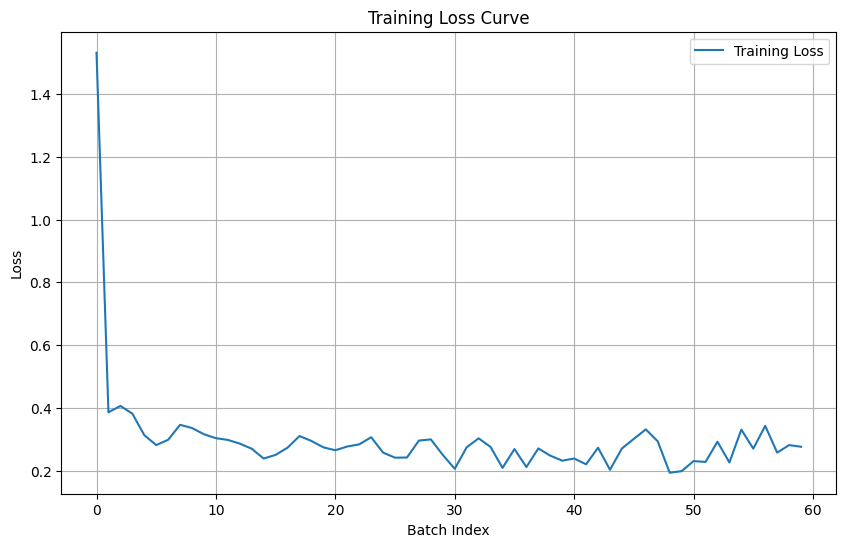

In [18]:
# import time

# # Define the training loop
# def train(model, device, train_loader, optimizer, epoch):
#     model.train()
#     for batch_idx, (data, target) in enumerate(train_loader):
#         def closure():
#             optimizer.zero_grad()
#             output = model(data)
#             loss = nn.CrossEntropyLoss()(output, target)
#             loss.backward()
#             return loss
#         data, target = data.to(device), target.to(device)
#         optimizer.step(closure)
#         if batch_idx % 10 == 0:
#             loss = closure()
#             print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# start_time = time.time()
# for epoch in range(1, 6):
#     train(model, device, train_loader, optimizer, epoch)
#     weight_manager.save_model(model, optimizer, epoch=epoch, dir_name=model_test, file_name=f'{model_test}_{epoch}_checkpoint.pth')
# end_time = time.time()
# print(f"Training Time: {end_time - start_time}")


import time
import matplotlib.pyplot as plt

# 全局变量，用于记录损失值
losses = []

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        def closure():
            optimizer.zero_grad()
            output = model(data)
            loss = nn.CrossEntropyLoss()(output, target)
            loss.backward()
            return loss
        data, target = data.to(device), target.to(device)
        optimizer.step(closure)
        if batch_idx % 10 == 0:
            loss = closure()
            # 将损失值保存到列表中
            losses.append(loss.item())
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# 训练模型并记录损失
start_time = time.time()
for epoch in range(1, 6):
    train(model, device, train_loader, optimizer, epoch)
    weight_manager.save_model(model, optimizer, epoch=epoch, dir_name=model_test, file_name=f'{model_test}_{epoch}_checkpoint.pth')
end_time = time.time()
print(f"Training Time: {end_time - start_time}")

# 绘制训练曲线
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Training Loss')
plt.xlabel('Batch Index')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid()
plt.show()

### 评估

#### 读取所有权重文件测试

In [19]:
# Evaluate the model
def evaluate(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += nn.CrossEntropyLoss()(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')



pth_files = weight_manager.list_pth_files(dir_name=model_test)

if pth_files:
    print("Available .pth files:")
    for pth_file in pth_files:
        print(f"- {pth_file}")
    for pth_file in pth_files:
        model, optimizer, start_epoch = weight_manager.load_model(model, optimizer, dir_name=f'{model_test}', file_name=f"{pth_file}", device=device)
        
        start_time = time.time()
        evaluate(model, device, test_loader)
        end_time = time.time()
        print(f"Inference Time: {end_time - start_time}")

# Evaluate the trained model
# evaluate(model, device, test_loader)

Found 5 .pth file(s) in '/home/jzgrp/huiwang/mio/Code/KAN/weights/KANKAN':
 - KANKAN_3_checkpoint.pth
 - KANKAN_5_checkpoint.pth
 - KANKAN_4_checkpoint.pth
 - KANKAN_1_checkpoint.pth
 - KANKAN_2_checkpoint.pth
Available .pth files:
- KANKAN_3_checkpoint.pth
- KANKAN_5_checkpoint.pth
- KANKAN_4_checkpoint.pth
- KANKAN_1_checkpoint.pth
- KANKAN_2_checkpoint.pth
Model loaded from /home/jzgrp/huiwang/mio/Code/KAN/weights/KANKAN/KANKAN_3_checkpoint.pth, starting from epoch 3



Test set: Average loss: 0.0005, Accuracy: 9235/10000 (92%)

Inference Time: 1.2625718116760254
Model loaded from /home/jzgrp/huiwang/mio/Code/KAN/weights/KANKAN/KANKAN_5_checkpoint.pth, starting from epoch 5

Test set: Average loss: 0.0006, Accuracy: 9206/10000 (92%)

Inference Time: 1.2912888526916504
Model loaded from /home/jzgrp/huiwang/mio/Code/KAN/weights/KANKAN/KANKAN_4_checkpoint.pth, starting from epoch 4

Test set: Average loss: 0.0006, Accuracy: 9106/10000 (91%)

Inference Time: 1.1142785549163818
Model loaded from /home/jzgrp/huiwang/mio/Code/KAN/weights/KANKAN/KANKAN_1_checkpoint.pth, starting from epoch 1

Test set: Average loss: 0.0006, Accuracy: 9112/10000 (91%)

Inference Time: 1.1152839660644531
Model loaded from /home/jzgrp/huiwang/mio/Code/KAN/weights/KANKAN/KANKAN_2_checkpoint.pth, starting from epoch 2

Test set: Average loss: 0.0006, Accuracy: 9166/10000 (92%)

Inference Time: 1.1163811683654785
